In [12]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import pycountry

from glob import glob

# Carregar dados

Dataset disponível em:

https://worldhappiness.report/ed/2024/#appendices-and-data


In [13]:
files=glob('../dados/archive/*.xls')
files

['../dados/archive/2024.xls', '../dados/archive/2008-2023.xls']

In [14]:
report_2024      =pd.read_excel('../dados/archive/2024.xls')
reports_2008_2023=pd.read_excel( '../dados/archive/2008-2023.xls')

In [15]:
#O report de 2024 conta com os dados somente para o índice de felicidade
report_2024.head()

,Country name,Ladder score
0,Finland,7.7407
1,Denmark,7.5827
2,Iceland,7.5251
3,Sweden,7.3441
4,Israel,7.3411


In [16]:
#Os reports de 2008 a 2023 contam com os indicadores
reports_2008_2023.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919


In [17]:
#o indicie de felicidade no report de 2024 é chamado de Ladder score e nos demais de Life Ladder	
# report de 2024 na conta com coluna com o ano
report_2024['year']=2024
report_2024.rename(columns={'Ladder score':'Life Ladder'},inplace=True)

In [18]:
##Concatenando os reports
report=pd.concat([reports_2008_2023,report_2024],axis=0)

In [19]:
report.sort_values(by=['Country name','year'],ascending=True,inplace=True)

In [20]:
report.head(20)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919
5,Afghanistan,2013,3.572100,7.680333,0.483552,52.000000,0.577955,0.059246,0.823204,0.547417,0.273328
6,Afghanistan,2014,3.130896,7.670638,0.525568,52.299999,0.508514,0.102330,0.871242,0.491641,0.374861
7,Afghanistan,2015,3.982855,7.653833,0.528597,52.599998,0.388928,0.078218,0.880638,0.491410,0.339276
8,Afghanistan,2016,4.220169,7.650370,0.559072,52.924999,0.522566,0.040480,0.793246,0.501409,0.348332
9,Afghanistan,2017,2.661718,7.647830,0.490880,53.250000,0.427011,-0.122848,0.954393,0.435270,0.371326


Helliwell, J. F., Layard, R., Sachs, J. D., De Neve, J.-E., Aknin, L. B., & Wang, S. (Eds.). (2024). World Happiness Report 2024. University of Oxford: Wellbeing Research Centre.

# Descrição dos dados

O dataset contém reports sobre o nível de felicidade em 155 países entre os anos de 2015 e 2024. O nível de felicidade foi medido em uma pesquisa em que pessoas eram solicitadas a dar uma nota para suas pŕoprias vidas, na qual 10 seria o melhor cenário possível e 0 o pior. Os reports contam com o score de felicidade obtido por cada país, além de 9 indicadores que podem ser usados para explicar o índice de felicidade. As definições das variáveis são apresentadas a seguir:

- Happiness score or subjective well-being (variable name ladder): Essa variável contém a média das repostas em cada país para a seguinte questão: Imagine uma escada com degraus numerados de 0 a 10. O topo da escada está com o número dez e representa o melhor cenário possível para a sua vida, enquanto o primeiro degrau está numerado com 0 e representa o pior cenário possível. Em qual degrau o você se colocaria nesse momento?

- GDP per capita : PIB per capita em poder de compra pareado considerando preços contantes em dólar em 2017; 

- Social support é a média nacional das repostas para a seguinte  pergunta: Em caso de dificuldades, você conta com familiares ou amigos que possam te ajudar (1 em caso positivo e 0 caso contrário)? 

- Healthy life expectancy é a expectativa de vida;	

- Freedom to make life choices é a média nacional das repostas para a seguinte pergunta: Você está safisfeito com a liberdade que possui para fazer escolhas na sua vida (1 em caso positivo e 0 caso contrário) ?;
 
- Generosity é o resíduo da regressão entre GDP per capita e a resposta média para a seguinte pergunta: Você doou dinheiro para caridade no mês passado?;

- Perceptions of corruption é a média das respostas para duas perguntas. A primeira delas é se a corrupção está disseminada no governo e a segunda se a corrupção está disseminada no mundo empresarial.;

- Positive affect é defindo como a média de para três medidas: sorriso, prazer e prática de atividades interessantes. Essas três medidas são mensuradas através das repostas para três perguntas, referentes a experiência dessas três sensações durante boa parte do dia anterior:
    1) Você riu ou sorriu muito ontem?
    2) Você desfrutou  de sensações prazerosas no dia de ontem?
    3) Você aprendeu ou realizou alguma atividade interessante ontem?

- Negative affect é defindo como a média de para três medidas: preucupação, tristeza e raiva. Essas três medidas são mensuradas através das repostas para três perguntas, referentes a experiência dessas três sensações durante boa parte do dia anterior:
    1) Você se sentiu preucupado durante boa parte de onte?
    2) Você se sentiu triste durante boa parte de ontem?
    3) Você sentiu raiva durante boa parte de ontem?


# Análise dos Indicadores

## Análise Preliminar

In [21]:
report.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506 entries, 0 to 137
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2506 non-null   object 
 1   year                              2506 non-null   int64  
 2   Life Ladder                       2506 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 234.9+ KB


In [22]:
#Contagem do número de valores nulos para cada indicador
report.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                  171
Social support                      156
Healthy life expectancy at birth    206
Freedom to make life choices        179
Generosity                          224
Perceptions of corruption           268
Positive affect                     167
Negative affect                     159
dtype: int64

In [23]:
report.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2506.000000,2506.000000,2335.000000,2350.000000,2300.000000,2327.000000,2282.000000,2238.000000,2339.000000,2347.000000
mean,2015.290902,5.486074,9.399673,0.809369,63.401828,0.750290,0.000096,0.743959,0.651878,0.273160
std,5.359899,1.127954,1.152062,0.121211,6.842644,0.139366,0.161386,0.184871,0.106249,0.087133
min,2005.000000,1.281271,5.526723,0.228217,6.720000,0.228301,-0.339547,0.035198,0.178886,0.082737
25%,2011.000000,4.648161,8.506165,0.743811,59.195001,0.660706,-0.111940,0.686784,0.571977,0.208559
50%,2015.000000,5.462700,9.502946,0.834395,65.099998,0.771122,-0.021613,0.798497,0.663420,0.262175
75%,2020.000000,6.329096,10.392974,0.903779,68.552502,0.861740,0.093569,0.867557,0.737262,0.326211
max,2024.000000,8.018934,11.675588,0.987343,74.599998,0.985178,0.699570,0.983276,0.883586,0.704590


## Adição de uma coluna com ranking dos países mais felizes

Será adicionada uma coluna no dataframe com os países rankeados de acordo com os índices de felicidade.Esse ranking é anual e será contruído com base na coluna Life Ladder.
A coluna criada terá o nome Rank_Felicidade

In [24]:
nome_coluna_ranking='Rank_Felicidade'
report[nome_coluna_ranking]=np.nan
report.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Rank_Felicidade
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195,NaN
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092,NaN
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324,NaN
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175,NaN
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919,NaN


In [25]:
years=report['year'].unique() #lista com os anos que estão no report
years
for year in years:
    ranking_anual=report.loc[report['year']==year,['Country name','Life Ladder']] #criação de um dataframe para gerar o ranking para um único ano
    ranking_anual['rank']=ranking_anual.loc[:,'Life Ladder'].rank(ascending=False)
    for pais in ranking_anual['Country name']: #adição dos ranking de cada ano no report
        report.loc[(report['Country name']==pais) & (report['year']==year),nome_coluna_ranking]=ranking_anual.loc[ranking_anual['Country name']==pais,'rank']


In [26]:
report.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Rank_Felicidade
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195,105.0
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092,96.0
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324,84.0
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175,140.0
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919,135.0


## Plotagem de Mapas

Serão criados mapas múndis onde cada país será colorido de acordo com o valor de um indicador escolhido.

Serão criados dois mapas:

- Mapa para um único indicador e ano;
- Mapa animado mostrando a evolução anual de um indicador selecionado.  

Para a criação dos mapas é necessária a adição de uma coluna no report com os códigos de cada país. Serão adicionados os códigos ISO 3166-1 alpha-3.

In [27]:
#Adicionando os códigos dos países nos reports para possibilitar a plotagem de mapas
#Os países serão identificados nos mapa pelos seus códigos

def gerar_codigo_pais(coluna):
    '''
    Função que gera o código do país a partir do seu nome. Esse códigos são necessários para a criação de mapas

    Inputs:
        Coluna de um pandas dataframe com nomes de países

    Outputs:
        Python list com os códigos dos países
    '''
    codigo=[]
    for nome_pais in coluna:
        try:
            codigo.append(pycountry.countries.get(name=nome_pais).alpha_3)
            #alpha_3 é para gerar um código de três letras
        except:
            codigo.append(None)
    return codigo
        

In [28]:
#Adicionando a coluna com o código do pais nos reports
report['Country_Code']=gerar_codigo_pais(report.loc[:,'Country name'])

In [29]:
report.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Rank_Felicidade,Country_Code
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195,105.0,AFG
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092,96.0,AFG
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324,84.0,AFG
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175,140.0,AFG
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919,135.0,AFG


In [30]:
#O código não foi criado para alguns países
report.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                  171
Social support                      156
Healthy life expectancy at birth    206
Freedom to make life choices        179
Generosity                          224
Perceptions of corruption           268
Positive affect                     167
Negative affect                     159
Rank_Felicidade                       0
Country_Code                        280
dtype: int64

In [31]:
report[report['Country_Code'].isnull()]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Rank_Felicidade,Country_Code
211,Bolivia,2006,5.373986,8.670665,0.834280,60.900002,0.770135,-0.048467,0.794484,0.708094,0.431945,36.0,None
212,Bolivia,2007,5.628419,8.697795,0.796136,61.099998,0.779935,-0.003597,0.816994,0.745735,0.387786,38.0,None
213,Bolivia,2008,5.297873,8.740166,0.785262,61.299999,0.725620,-0.095964,0.801420,0.723478,0.392080,53.0,None
214,Bolivia,2009,6.085579,8.756054,0.831320,61.500000,0.778939,-0.040327,0.762605,0.742099,0.372369,33.0,None
215,Bolivia,2010,5.780620,8.779530,0.807186,61.700001,0.703341,-0.072668,0.781343,0.720218,0.349597,50.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2310,Vietnam,2020,5.462342,9.254416,0.764510,65.400002,0.944707,0.063276,0.791134,0.699165,0.286374,68.0,None
2311,Vietnam,2021,5.540250,9.271268,0.799494,65.500000,0.896800,0.104378,0.797788,0.650598,0.280437,70.0,None
2312,Vietnam,2022,6.266509,9.341064,0.878744,65.599998,0.975405,-0.182106,0.703423,0.774236,0.108473,40.0,None
2313,Vietnam,2023,6.325115,9.392351,0.844905,65.699997,0.955560,-0.159114,0.655275,0.710068,0.119510,44.0,None


In [32]:
#19 paises não tem código
report[report['Country_Code'].isnull()]['Country name'].nunique()

19

In [33]:
#Países para os quais os códigos não foram encontrados. 
paises_sem_codigo=report[report['Country_Code'].isnull()]['Country name'].unique()
paises_sem_codigo

array(['Bolivia', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Hong Kong S.A.R. of China', 'Iran', 'Ivory Coast', 'Kosovo',
       'Laos', 'Moldova', 'Russia', 'Somaliland region', 'South Korea',
       'State of Palestine', 'Syria', 'Taiwan Province of China',
       'Tanzania', 'Turkiye', 'Venezuela', 'Vietnam'], dtype=object)

Códigos dos países que aparecem nulos no report:

- Bolivia = BOL
- Congo (Brazzaville) é a República do Congo = COG
- Congo (Kinshasa) é e República Democrática do Congo = COD
- Hong Kong S.A.R. of China = HKG
- Iran = IRN
- Ivory Coast (Côte d'Ivoire) = CIV
- Kosovo (United Nations Interim Administration in Kosovo) = UNMIK
- Laos = LAO
- Moldova = MDA
- Russia = RUS
- Somaliland - pais não reconhecido, parte integrante da Somália
- South Korea = KOR
- State of Palestine = PSE
- Syria = SYR
- Taiwan Province of China = TWN
- Tanzania = TZA
- Turkiye = TUR
- Venezuela = VEN
- Vietnam = VNM



In [34]:
codigos_ausentes=['BOL','COG','COD','HKG','IRN','CIV','UNMIK','LAO','MDA','RUS',np.nan,'KOR','PSE','SYR','TWN','TZA','TUR','VEN','VNM']

In [35]:
for num, nome_pais in enumerate(paises_sem_codigo):
    report.loc[report['Country name']==nome_pais,'Country_Code']=codigos_ausentes[num]
    print(nome_pais)
    print(codigos_ausentes[num])
    print('')

Bolivia
BOL

Congo (Brazzaville)
COG

Congo (Kinshasa)
COD

Hong Kong S.A.R. of China
HKG

Iran
IRN

Ivory Coast
CIV

Kosovo
UNMIK

Laos
LAO

Moldova
MDA

Russia
RUS

Somaliland region
nan

South Korea
KOR

State of Palestine
PSE

Syria
SYR

Taiwan Province of China
TWN

Tanzania
TZA

Turkiye
TUR

Venezuela
VEN

Vietnam
VNM



In [36]:
#Restaram somente 4 entradas sem código para o pais
report.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                  171
Social support                      156
Healthy life expectancy at birth    206
Freedom to make life choices        179
Generosity                          224
Perceptions of corruption           268
Positive affect                     167
Negative affect                     159
Rank_Felicidade                       0
Country_Code                          4
dtype: int64

In [37]:
#As 4 entradas sem código para os paés são referentes a Somaliland region
report.loc[report['Country_Code'].isnull(),:]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Rank_Felicidade,Country_Code
1886,Somaliland region,2009,4.991400,NaN,0.879567,NaN,0.746304,NaN,0.513372,0.707874,0.112012,74.0,NaN
1887,Somaliland region,2010,4.657363,NaN,0.829005,NaN,0.820182,NaN,0.471094,0.631947,0.083426,91.0,NaN
1888,Somaliland region,2011,4.930572,NaN,0.787962,NaN,0.858104,NaN,0.357341,0.690514,0.122244,90.0,NaN
1889,Somaliland region,2012,5.057314,NaN,0.786291,NaN,0.758219,NaN,0.333832,0.686732,0.152428,82.0,NaN


### Mapas com indicadores para ano selecionado

In [38]:
report['year'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2021, 2022, 2023, 2024, 2007, 2020, 2006, 2005])

In [39]:
report.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Rank_Felicidade', 'Country_Code'],
      dtype='object')

Geração dos mapas:

- Os mapas podem ser gerados para os reports anuais. Os anos disponíveis estão entre 2018 e 2019;
- Os mapas podem ser gerados para os seguintes indicadores:

    - Life Ladder;
    - Log GDP per capita;	
    - Social support;
    - Healthy life expectancy at birth;
    - Freedom to make life choices;
    - Generosity;
    - Perceptions of corruption;
    - Positive affect;
    - Negative affect;
    - Rank_Felicidade


In [40]:
def gerar_mapa(dados,ano,indicador,column_ano='year',column_paises='Country name',column_codigos='Country_Code',projecao='natural earth'):
    '''
    Função para gerar o mapa mundi com cada país colorido de acordo com o valor do indicador selecionado

    dados          - (pandas dataframe) Dataframe com os dados
    ano            - (str) Ano do report entre 2015 e 2019. Refere-se ao ano dos indicadores.
    indicador      - (str) Indicador que será mostrado no mapa. Indicadores aceitos:  Life Ladder, Log GDP per capita, Social support, Healthy life expectancy at birth, 
                            Freedom to make life choices , Generosity, Perceptions of corruption Positive affect,Negative affect e Ranking_Felicidade.
    column_ano     - (str) nome da coluna no dataframe dados onde estão os anos
    column_paises  - (str) nome da coluna no dataframe dados onde estão os nomes dos países
    column_codigos - (str) nome da coluna no dataframe dados onde estão os códigos dos países
    projecao       - (str) nome da projeção que será usada para plotar o mapa

    '''
    dados=dados.copy()
    if ano not in np.arange(2008,2025):
        raise Exception('Report indisponivel. Os reports disponíveis são os dos anos 2008 a 2025')
    if indicador not in ['Life Ladder','Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices',
                         'Generosity','Perceptions of corruption','Positive affect','Negative affect','Rank_Felicidade']:
        raise Exception('Indicador não conhecido')
    dados= dados.loc[dados[column_ano]==ano,:]
    #if indicador==nome_coluna_ranking:
    #    dados.loc[:,[indicador]]=(dados[indicador]-len(dados)).abs()
    #    print(dados.head())
    fig = px.choropleth(dados, locations=column_codigos, color=indicador, hover_name=column_paises,
                    projection=projecao, title=indicador+' '+str(ano))
    fig.show()


In [41]:
gerar_mapa(report,2022,'Rank_Felicidade')  
#https://plotly.com/python/figurewidget-app/
#https://www.datacamp.com/tutorial/making-map-in-python-using-plotly-library-guide

### Mapas com evolução do indicador selecionado ao longo dos anos

In [42]:
def mapa_animado(dados,indicador,column_codigos='Country_Code',column_paises='Country name',projecao='natural earth',animation_frame='year'):
    '''
    Função para gerar o mapa mundi com cada país colorido de acordo com o valor do indicador selecionado
    No mapa será mostrado a evolução do indicador a longo dos anos, de 2015 a 2019

    dados          - (pandas dataframe) Dataframe com os dados
    indicador      - (str) Indicador que será mostrado no mapa. Indicadores aceitos:  Life Ladder, Log GDP per capita, Social support, Healthy life expectancy at birth, 
                            Freedom to make life choices , Generosity, Perceptions of corruption Positive affect,Negative affect e Rank_Felicidade.
    column_paises  - (str) nome da coluna no dataframe dados onde estão os nomes dos países
    column_codigos - (str) nome da coluna no dataframe dados onde estão os códigos dos países
    projecao       - (str) nome da projeção que será usada para plotar o mapa
    '''

    if indicador not in ['Life Ladder','Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices',
                         'Generosity','Perceptions of corruption','Positive affect','Negative affect','Rank_Felicidade']:
        raise Exception('Indicador não conhecido')
    
    fig = px.choropleth(dados, locations=column_codigos, color=indicador, hover_name=column_paises,animation_frame=animation_frame,
                    projection=projecao,title=indicador)
    fig.show()


In [43]:
mapa_animado(report,'Life Ladder')

## Evolução Anual dos Indicadores


### Maiores variações ao longo do intervalo considerado 

In [47]:
report.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Rank_Felicidade', 'Country_Code'],
      dtype='object')

In [48]:
#Calcular desvio padrão dos indicadores
desvio_padrao_indicadores=report.groupby('Country name').std(numeric_only=True)
desvio_padrao_indicadores.drop(columns='year',inplace=True)
desvio_padrao_indicadores

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Rank_Felicidade
Country name,,,,,,,,,,
Afghanistan,1.075516,0.118946,0.086368,1.495704,0.130603,0.122482,0.085034,0.127441,0.118340,18.699265
Albania,0.404779,0.152411,0.064594,0.775520,0.121426,0.083598,0.042768,0.024917,0.035617,19.799361
Algeria,0.381603,0.031971,0.033054,0.412972,0.078874,0.069561,0.053746,0.026913,0.055445,18.864750
Angola,0.815301,0.028901,0.018078,0.800417,0.091470,0.098923,0.048839,0.038424,0.031127,32.562760
Argentina,0.293461,0.059940,0.018778,0.478601,0.072136,0.045713,0.030320,0.027584,0.040236,14.327008
...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.965649,1.631008,0.040498,0.577812,0.107257,0.123136,0.056088,0.059110,0.087370,38.291281
Vietnam,0.385127,0.265007,0.044213,0.476753,0.048019,0.105282,0.048216,0.085274,0.046327,17.311559
Yemen,0.526193,0.405118,0.077981,0.682944,0.052518,0.054189,0.044135,0.050760,0.049471,19.766012


In [56]:
desvio_padrao_indicadores.sort_values(by='Rank_Felicidade',ascending=False).head(10)

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Rank_Felicidade
Country name,,,,,,,,,,
Venezuela,0.965649,1.631008,0.040498,0.577812,0.107257,0.123136,0.056088,0.059110,0.087370,38.291281
Syria,0.969114,0.120235,0.166574,4.242121,0.119777,0.106692,0.032223,0.078333,0.190414,36.321317
Angola,0.815301,0.028901,0.018078,0.800417,0.091470,0.098923,0.048839,0.038424,0.031127,32.562760
Jordan,0.671085,0.102869,0.065044,0.596104,0.038938,0.044701,0.034447,0.055416,0.068696,31.934326
Lebanon,1.116624,0.143000,0.104293,0.368008,0.088740,0.079182,0.027815,0.086414,0.093341,31.380890
Egypt,0.514439,0.111391,0.057329,0.828933,0.105599,0.048548,0.105777,0.079877,0.054086,31.020555
Botswana,0.645244,0.068883,0.053365,1.826334,0.038546,0.055503,0.043872,0.026657,0.041328,30.656779
India,0.545837,0.248958,0.048613,1.776911,0.083898,0.063611,0.051631,0.056561,0.073626,27.991749
Zambia,0.684163,0.096361,0.066923,2.988058,0.063162,0.077277,0.064378,0.033891,0.079074,27.581430


In [52]:
report.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Rank_Felicidade', 'Country_Code'],
      dtype='object')

In [66]:
def maiores_variacoes_indicadores(reports,indicador,num_paises,coluna_paises='Country name',column_year='year'):
    '''
    Função para gerar um dataframe com os países onde ocorreram as maiores variações do parâmetro selecionado
    As variações dos parâmetros são calculadas pelo desvio padrão do indicador ao longo dos anos

    inputs:
        reports  : (pandas Dataframe) as colunas do dataframe são indicadores e em cada linha estão os indicadores para um país em determinado ano
        indicador: (str) o indicador que se deseja analisar. As opções possíveis são: 'Life Ladder','Log GDP per capita','Social support','Healthy life expectancy at birth',
                        'Freedom to make life choices','Generosity','Perceptions of corruption','Positive affect','Negative affect','Rank_Felicidade'
        num_paises: (int) número de países que aparecerão no dataframe gerado. Por exemplo, caso num_paises igual a 10, será retornado um dataframe com os 
                        10 paises onde ocorreram as maiores variações do indicador selecionado
        coluna_paises: (str) Nome da coluna no dataframe onde estão os nomes dos países
        column_year  : (str) Nome da coluna no dataframe onde estão os anos

    outputs: (pandas dataframe) dataframe com o indice selecionado ao longo dos anos para os num_paises onde ocoreram as maiores variações para o índice seleciondado
    '''
    desvio_padrao_indicadores=reports.groupby(coluna_paises).std(numeric_only=True) #calculo do desvio padrão dos indicadores
    desvio_padrao_indicadores.drop(columns=column_year,inplace=True)
    
    df_indicador=desvio_padrao_indicadores.loc[:,[indicador]].sort_values(by=indicador,ascending=False)
    df_indicador.rename(columns={indicador:indicador+'_dp'},inplace=True) #renomear o indicador para não causar dúvidas no momento do join
    df_indicador.reset_index(inplace=True) #df_indicador é um dataframe com os paises com as maiores variações do indicador escolhido
    df_indicador=df_indicador.iloc[:num_paises,:] #selecionar somente os n primeiros paises
    resultado=pd.merge(df_indicador,reports,on=coluna_paises,how='inner')
    resultado=resultado.loc[:,[coluna_paises,indicador,column_year]]
    resultado=resultado.pivot_table(columns=coluna_paises,index=column_year,dropna=False)
    
    return resultado

In [68]:
maiores_dp_felicidade=maiores_variacoes_indicadores(report,'Rank_Felicidade',10)
maiores_dp_felicidade

Rank_Felicidade                                                 \
Country name          Angola Botswana  Egypt  India Jordan Lebanon Pakistan   
year                                                                          
2005                     NaN      NaN   25.0    NaN   18.0    21.0     23.0   
2006                     NaN     53.0    NaN   38.0    NaN    60.0      NaN   
2007                     NaN      NaN   42.0   61.0   41.0     NaN     37.0   
2008                     NaN     47.0   82.0   57.0   70.0    83.0     91.0   
2009                     NaN      NaN   72.0   90.0   37.0    65.0     64.0   
2010                     NaN    123.0   89.0   78.0   58.0    75.0     49.0   
2011                    58.0    145.0  129.0  113.0   59.0    76.0     72.0   
2012                   115.0     94.0  125.0   98.0   77.0   107.0     78.0   
2013                   117.0    113.0  131.0  105.0   72.0    84.0     76.0   
2014                   132.0    124.0   93.0  112.0   72.0    79.0     69.0   
2015                     NaN    131.0  100.0  117.0   69.0    75.0     98.0   
2016                     NaN    134.0  102.0  121.0   80.0    81.0     64.0   
2017                     NaN    140.0  136.0  133.0  100.0    86.0     61.0   
2018                     NaN    137.0  130.0  132.0  112.0    87.0     70.0   
2019                     NaN    137.0  124.0  141.0  118.0   133.0    119.0   
2020                     NaN      NaN  106.0  112.0  113.0   116.0    102.0   
2021                     NaN      NaN  113.0  118.0  114.0   122.0    102.0   
2022                     NaN    132.0  122.0  125.0  113.0   139.0     97.0   
2023                     NaN    136.0  127.0  104.0  122.0   131.0    107.0   
2024                     NaN    137.0  127.0  126.0  125.0   142.0    108.0   

                                      
Country name  Syria Venezuela Zambia  
year                                  
2005            NaN       7.0    NaN  
2006            NaN      12.0   50.0  
2007            NaN       NaN   97.0  
2008           51.0      28.0   76.0  
2009           76.0       7.0   61.0  
2010           97.0       5.0    NaN  
2011          134.0      29.0   83.0  
2012          141.0      16.0   86.0  
2013          136.0      28.0   69.0  
2014            NaN      41.0  115.0  
2015          140.0      64.0   97.0  
2016            NaN     123.0  114.0  
2017            NaN      95.0  135.0  
2018            NaN      94.0  128.0  
2019            NaN      94.0  139.0  
2020            NaN     103.0   93.0  
2021            NaN      85.0  120.0  
2022            NaN      59.0  126.0  
2023            NaN      76.0  128.0  
2024            NaN      79.0  134.0

### Variações entre dois anos 

In [23]:
reports_2015_a_2019.columns

Index(['Overall rank', 'Country', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Year', 'Trust (Government Corruption)',
       'Country_Code'],
      dtype='object')

In [24]:
#anos = [2015,2016,2017,2018,2019]
indicadores=['Overall rank','Score','GDP per capita','Social support',
            'Healthy life expectancy','Freedom to make life choices',
            'Generosity','Perceptions of corruption','Trust (Government Corruption)']


In [27]:
def calcular_diferenca(report, ano_inicial,ano_final,lista_indicadores):
    indicadores_ano_inicial=report[report['Year']==ano_inicial].set_index('Country')
    indicadores_ano_final  =report[report['Year']==ano_final].set_index('Country')

    indicadores_ano_final=indicadores_ano_final.loc[:,lista_indicadores]
    indicadores_ano_inicial=indicadores_ano_inicial.loc[:,lista_indicadores]

    diferenca=indicadores_ano_final-indicadores_ano_inicial
    diferenca=indicadores_ano_final-indicadores_ano_inicial

    return indicadores_ano_inicial,indicadores_ano_final,diferenca



In [28]:
inicial,final,diff=calcular_diferenca(reports_2015_a_2019,2019,2015,indicadores)

In [29]:
inicial

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Trust (Government Corruption)
Country,,,,,,,,,
Afghanistan,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025,NaN
Albania,107,4.719,0.947,0.848,0.874,0.383,0.178,0.027,NaN
Algeria,88,5.211,1.002,1.160,0.785,0.086,0.073,0.114,NaN
Argentina,47,6.086,1.092,1.432,0.881,0.471,0.066,0.050,NaN
Armenia,116,4.559,0.850,1.055,0.815,0.283,0.095,0.064,NaN
...,...,...,...,...,...,...,...,...,...
Venezuela,108,4.707,0.960,1.427,0.805,0.154,0.064,0.047,NaN
Vietnam,94,5.175,0.741,1.346,0.851,0.543,0.147,0.073,NaN
Yemen,151,3.380,0.287,1.163,0.463,0.143,0.108,0.077,NaN


In [30]:
final

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Trust (Government Corruption)
Country,,,,,,,,,
Afghanistan,153,NaN,0.31982,0.30285,0.30335,0.23414,0.36510,NaN,0.09719
Albania,95,NaN,0.87867,0.80434,0.81325,0.35733,0.14272,NaN,0.06413
Algeria,68,NaN,0.93929,1.07772,0.61766,0.28579,0.07822,NaN,0.17383
Angola,137,NaN,0.75778,0.86040,0.16683,0.10384,0.12344,NaN,0.07122
Argentina,30,NaN,1.05351,1.24823,0.78723,0.44974,0.11451,NaN,0.08484
...,...,...,...,...,...,...,...,...,...
Venezuela,23,NaN,1.04424,1.25596,0.72052,0.42908,0.05841,NaN,0.11069
Vietnam,75,NaN,0.63216,0.91226,0.74676,0.59444,0.16860,NaN,0.10441
Yemen,136,NaN,0.54649,0.68093,0.40064,0.35571,0.09131,NaN,0.07854


In [82]:
diff

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Trust (Government Corruption)
Country,,,,,,,,,
Afghanistan,-1.0,NaN,-0.03018,-0.21415,-0.05765,0.23414,0.20710,NaN,NaN
Albania,-12.0,NaN,-0.06833,-0.04366,-0.06075,-0.02567,-0.03528,NaN,NaN
Algeria,-20.0,NaN,-0.06271,-0.08228,-0.16734,0.19979,0.00522,NaN,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,-17.0,NaN,-0.03849,-0.18377,-0.09377,-0.02126,0.04851,NaN,NaN
...,...,...,...,...,...,...,...,...,...
Venezuela,-85.0,NaN,0.08424,-0.17104,-0.08448,0.27508,-0.00559,NaN,NaN
Vietnam,-19.0,NaN,-0.10884,-0.43374,-0.10424,0.05144,0.02160,NaN,NaN
Yemen,-15.0,NaN,0.25949,-0.48207,-0.06236,0.21271,-0.01669,NaN,NaN


In [34]:
diff.loc['Vietnam',:]

Overall rank                    -19.00000
Score                                 NaN
GDP per capita                   -0.10884
Social support                   -0.43374
Healthy life expectancy          -0.10424
Freedom to make life choices      0.05144
Generosity                        0.02160
Perceptions of corruption             NaN
Trust (Government Corruption)         NaN
Name: Vietnam, dtype: float64

## Score Felicidade

In [50]:
indicador='Score'
num_paises=5
variacao_score_felicidade=maiores_variacoes_indicadores(reports_2015_a_2019,indicador,num_paises)

In [51]:
variacao_score_felicidade=variacao_score_felicidade[indicador].dropna(axis=0,how='all')

/home/rodolfo/anaconda3/envs/Trabalho/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/rodolfo/anaconda3/envs/Trabalho/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



([<matplotlib.axis.XTick at 0x7dd1be454910>,
 [Text(2015, 0, '2015'),
  Text(2016, 0, '2016'),
  Text(2017, 0, '2017'),
  Text(2018, 0, '2018'),
  Text(2019, 0, '2019')])

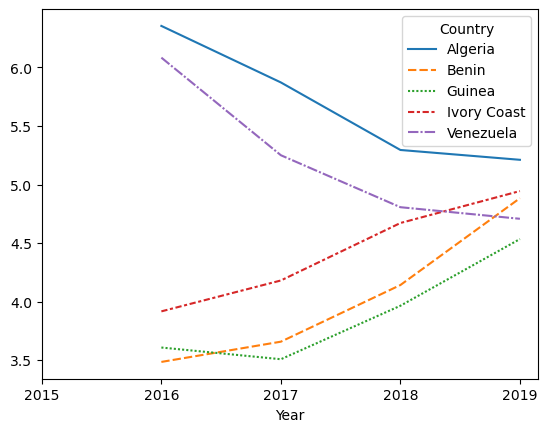

In [52]:
sns.lineplot(data=variacao_score_felicidade)
plt.xticks(reports_2015_a_2019['Year'].unique())

In [53]:
pip list

Package                           Version
--------------------------------- -------------------
absl-py                           1.0.0
aiofiles                          22.1.0
aiohttp                           3.9.3
aiosignal                         1.2.0
aiosqlite                         0.18.0
altair                            5.0.1
anyio                             3.5.0
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
astor                             0.8.1
asttokens                         2.0.5
astunparse                        1.6.3
async-timeout                     4.0.3
attrs                             23.1.0
Babel                             2.11.0
backcall                          0.2.0
beautifulsoup4                    4.12.2
black                             21.12b0
bleach                            4.1.0
blinker                           1.6.2
Bottleneck                        1.3.7
Brotli                            1.0.9
cachetools     

In [56]:
teste_2015=reports_2015_a_2019[reports_2015_a_2019['Year']==2015].set_index('Country')

In [57]:
teste_2015

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year,Trust (Government Corruption),Country_Code
Country,,,,,,,,,,,
Afghanistan,153,NaN,0.31982,0.30285,0.30335,0.23414,0.36510,NaN,2015,0.09719,AFG
Albania,95,NaN,0.87867,0.80434,0.81325,0.35733,0.14272,NaN,2015,0.06413,ALB
Algeria,68,NaN,0.93929,1.07772,0.61766,0.28579,0.07822,NaN,2015,0.17383,DZA
Angola,137,NaN,0.75778,0.86040,0.16683,0.10384,0.12344,NaN,2015,0.07122,AGO
Argentina,30,NaN,1.05351,1.24823,0.78723,0.44974,0.11451,NaN,2015,0.08484,ARG
...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,23,NaN,1.04424,1.25596,0.72052,0.42908,0.05841,NaN,2015,0.11069,None
Vietnam,75,NaN,0.63216,0.91226,0.74676,0.59444,0.16860,NaN,2015,0.10441,None
Yemen,136,NaN,0.54649,0.68093,0.40064,0.35571,0.09131,NaN,2015,0.07854,YEM


In [61]:
teste_2019=reports_2015_a_2019[reports_2015_a_2019['Year']==2019].set_index('Country')

In [62]:
teste_2019

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year,Trust (Government Corruption),Country_Code
Country,,,,,,,,,,,
Afghanistan,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025,2019,NaN,AFG
Albania,107,4.719,0.947,0.848,0.874,0.383,0.178,0.027,2019,NaN,ALB
Algeria,88,5.211,1.002,1.160,0.785,0.086,0.073,0.114,2019,NaN,DZA
Argentina,47,6.086,1.092,1.432,0.881,0.471,0.066,0.050,2019,NaN,ARG
Armenia,116,4.559,0.850,1.055,0.815,0.283,0.095,0.064,2019,NaN,ARM
...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,108,4.707,0.960,1.427,0.805,0.154,0.064,0.047,2019,NaN,None
Vietnam,94,5.175,0.741,1.346,0.851,0.543,0.147,0.073,2019,NaN,None
Yemen,151,3.380,0.287,1.163,0.463,0.143,0.108,0.077,2019,NaN,YEM


In [64]:
indicadores=['Overall rank']

In [65]:
diff=teste_2019.loc[:,indicadores].sub(teste_2015.loc[:,indicadores])
diff

,Overall rank
Country,
Afghanistan,1.0
Albania,12.0
Algeria,20.0
Angola,NaN
Argentina,17.0
...,...
Venezuela,85.0
Vietnam,19.0
Yemen,15.0


In [72]:
teste_2015.loc['Zambia',indicadores]

Overall rank    85
Name: Zambia, dtype: object

In [71]:
teste_2019.loc['Zambia',indicadores]

Overall rank    138
Name: Zambia, dtype: object

In [73]:
138-85

53